# Table of Contents
```
1. Business Understanding
   1.1. Problem Description
2. Data Understanding
   2.1. Import Libraries, Modules, Functions, Objects, etc.
   2.2. User Defined Functions (UDFs)
   2.3. Data Loading
   2.4. Exploratory Data Analysis (EDA)
        2.4.1. Text EDA: Understand the raw data with Descriptive Statistics
        2.4.2. Visual EDA: Understand the data with Visualizations
               2.4.2.1. Draw Multivariate plots to better understand the relationship between attributes
3. Research
   3.1. List of selected algorithms to build models
   3.2. List of model evaluation metrics
4. Data Preprocessing
   4.1. Data Cleaning
        4.1.1. Basic data cleaning
   4.2. Feature Selection
   4.3. Feature Engineering
   4.4. Dimensionality Reduction
   4.5. Split datasets for train-test
        4.5.1. Create Independent(X) and Dependent(y) variables
        4.5.2. Split the dataset into train and test
   4.6. Handling Imbalanced classes
5. Model Development
   5.1. Model definitions
6. Model Training
7. Model Refinement
8. Model Evaluation
9. Final Model Selection
10. Model Validation
11. Model Deployment
```

# 1. Business Understanding

## 1.1. Problem Description

**`Problem statement`**:

`In business terms`: 

Blight violations are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: *`how can we increase blight ticket compliance?`*

The dataset has been downloaded from `City of Detroit Open Data Portal` and split into 2 input data files for use in training and validating your models: *`CoD_blight_violations_train.csv`* and *`CoD_blight_violations_test.csv`*. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is `compliance`, which is `True` if the ticket was paid early, on time, or within one month of the hearing data, `False` if the ticket was paid after the hearing date or not at all, and `Null` if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in *`CoD_blight_violations_train.csv`*.

`Note`: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

**File descriptions** (Use only this data for training your model!)

    train.csv - The training set (all tickets issued 2004-2011)
    test.csv  - The test set (all tickets issued 2012-2016)

**Data fields**

train.csv & test.csv

    ticket_id                   - unique identifier for tickets
    agency_name                 - Agency that issued the ticket
    inspector_name              - Name of inspector that issued the ticket
    violator_name               - Name of the person/organization that the ticket was issued to
    violation_street_number, 
    violation_street_name, 
    violation_zip_code          - Address where the violation occurred (3 attributes)
    mailing_address_str_number, 
    mailing_address_str_name, 
    city, 
    state, 
    zip_code, 
    non_us_str_code, 
    country                     - Mailing address of the violator (7 attributes)
    ticket_issued_date          - Date and time the ticket was issued
    hearing_date                - Date and time the violator's hearing was scheduled
    violation_code, 
    violation_description       - Type of violation (2 attributes)
    disposition                 - Judgment and judgement type
    fine_amount                 - Violation fine amount, excluding fees
    admin_fee                   - 20 dollar fee assigned to responsible judgments
    state_fee                   - 10 dollar fee assigned to responsible judgments
    late_fee                    - 10% fee assigned to responsible judgments
    discount_amount             - discount applied, if any
    clean_up_cost               - DPW clean-up or graffiti removal cost
    judgment_amount             - Sum of all fines and fees
    grafitti_status             - Flag for graffiti violations

train.csv only

    payment_amount              - Amount paid, if any
    payment_date                - Date payment was made, if it was received
    payment_status              - Current payment status as of Feb 1 2017
    balance_due                 - Fines and fees still owed
    collection_status           - Flag for payments in collections
    compliance [target variable for prediction] 
                                  Null = Not responsible
                                  0    = Responsible, non-compliant
                                  1    = Responsible, compliant
    compliance_detail           - More information on why each ticket was marked compliant or non-compliant

`In analytical terms`: 
* The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. 
* Build a predictive model to predict whether a given blight ticket will be paid on time or not: Develop and train a model to predict blight ticket compliance in Detroit using `CoD_blight_violations_train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `CoD_blight_violations_test.csv` will be paid, and the index being the ticket_id.
* Generate your predictions as the probability that the corresponding blight ticket will be paid on time.

**`Type of the problem`**: Supervised Learning - Classification - Probability

**`Data source(s)`**: [City of Detroit Open Data Portal-Blight Violations](https://data.detroitmi.gov/datasets/blight-violations) and [Coursera](https://www.coursera.org/)
    
**`Author(s)`**: Balasubramanian Chandran

# 2. Data Understanding

## 2.1. Import Libraries, Modules, Functions, Objects, etc.

In [1]:
# Import necessary libraries for this project
import sys         as sys
import numpy       as np
import pandas      as pd
import seaborn     as sns
import matplotlib  as mpl
import pickle      as pickle
import warnings

# Import necessary Modules, Functions and Objects from the Libraries
from pandas                        import read_csv
from imblearn.over_sampling        import SMOTE
from sklearn.metrics               import roc_auc_score
from sklearn.model_selection       import train_test_split
from matplotlib                    import pyplot as plt
from sklearn.linear_model          import LogisticRegression
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.naive_bayes           import GaussianNB
from sklearn.neural_network        import MLPClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier, GradientBoostingClassifier
from xgboost                       import XGBClassifier

# Check the versions of the imported libraries
print("Versions of imported libraries:")
print("Python:     {}".format(sys.version))
print("Numpy:      {}".format(np.__version__))
print("Pandas:     {}".format(pd.__version__))
print("Seaborn:    {}".format(sns.__version__))
print("Matplotlib: {}".format(mpl.__version__))

# Optional settings
mpl.style.use('ggplot')
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None, 'precision', 3)
warnings.filterwarnings('ignore')

print(__doc__)

Versions of imported libraries:
Python:     3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
Numpy:      1.19.5
Pandas:     1.3.2
Seaborn:    0.11.2
Matplotlib: 3.4.2
Automatically created module for IPython interactive environment


## 2.2. User Defined Functions (UDFs)

In [2]:
def plot_histogram(feature, dfname, binwidth, binrange):
    fig = plt.figure(figsize=(12, 6))
    ax = sns.histplot(data=feature, binwidth=binwidth, binrange=binrange, stat='count')
    title = 'Distribution of Judgment Amount in '+ dfname +' dataset'
    ax.set_title(title, size='large', color='brown', alpha=0.8)
    ax.set_xlabel('Judgment Amount', fontsize='large', color='brown', alpha=0.6)
    ax.set_ylabel('No. of Tickets', fontsize='large', color='brown', alpha=0.6)
    
def plot_performance_metrics(scores_list, scores_names, colors, modelnames):
    fig, axes = plt.subplots(1, len(scores_names), figsize=(12, 5))
    for i in range(len(scores_names)):
        axes[i].bar(modelnames, scores_list[i], color=colors[i])
        axes[i].set_title(scores_names[i], fontsize=15, alpha=0.6, pad=20)
    j = 0
    for scores in scores_list:
        xpos = 0
        for i in scores:
            text = str(i*100)[:5]
            axes[j].text(x=xpos, y=i, s=text, ha='center', va='bottom')
            for spine in axes[j].spines:
                axes[j].spines[spine].set_visible(False)
                axes[j].spines['left'].set_visible(True)
                axes[j].spines['left'].set_alpha(0.4)
                axes[j].spines['bottom'].set_visible(True)
                axes[j].spines['bottom'].set_alpha(0.4)
            xpos += 1
        j += 1
    plt.show()

## 2.3. Data Loading

In [3]:
## Load the necessary data files for this project ##
train_df = read_csv('data/CoD_blight_violations_train.csv', encoding='ISO-8859-1')
test_df  = read_csv('data/CoD_blight_violations_test.csv', encoding='ISO-8859-1')

## 2.4. Exploratory Data Analysis (EDA)

### 2.4.1. `Text EDA`: Understand the raw data with Descriptive Statistics

#### Dimensions of the datasets:

In [4]:
print('Dimension of the TRAIN dataset: ', train_df.shape)
print('Dimension of the TEST dataset:  ', test_df.shape)

Dimension of the TRAIN dataset:  (250306, 34)
Dimension of the TEST dataset:   (61001, 27)


#### Initial look at the raw data in `train dataset` - First & Last 10 rows:

In [5]:
train_df.head().style.highlight_null('brown').hide_index()

ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.000,TYLER,nan,3.000,S. WICKER,CHICAGO,IL,60606,nan,USA,2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of compliance,Responsible by Default,250.000,20.000,10.000,25.000,0.000,0.000,305.000,0.000,305.000,nan,NO PAYMENT APPLIED,nan,nan,non-compliant by no payment,0.000
27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.000,CENTRAL,nan,2959.000,Martin Luther King,Detroit,MI,48208,nan,USA,2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Building,Responsible by Determination,750.000,20.000,10.000,75.000,0.000,0.000,855.000,780.000,75.000,2005-06-02 00:00:00,PAID IN FULL,nan,nan,compliant by late payment within 1 month,1.000
22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.000,LONGFELLOW,nan,23658.000,P.O. BOX,DETROIT,MI,48223,nan,USA,2004-04-26 13:40:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of compliance,Not responsible by Dismissal,250.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,NO PAYMENT APPLIED,nan,nan,not responsible by disposition,nan
22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.000,LONGFELLOW,nan,5.000,ST. CLAIR,DETROIT,MI,48214,nan,USA,2004-04-26 13:30:00,nan,9-1-36(a),Failure of owner to obtain certificate of compliance,Not responsible by City Dismissal,250.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,NO PAYMENT APPLIED,nan,nan,not responsible by disposition,nan
22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.000,CHURCHILL,nan,7449.000,CHURCHILL,DETROIT,MI,48206,nan,USA,2004-04-26 13:00:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of compliance,Not responsible by Dismissal,250.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,NO PAYMENT APPLIED,nan,nan,not responsible by disposition,nan


In [6]:
train_df.tail().style.highlight_null('brown').hide_index()

ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
325555,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.000,SANTA MARIA,nan,1715.000,MEYERS,DETROIT,MI,48235,nan,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,"Fail to comply with an Emergency or imminent danger order concerining an unsafe or unsanitary structure or unlawful occupancy (all other structures, except buildings with five (5) or more stories)",Not responsible by City Dismissal,1000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,NO PAYMENT APPLIED,nan,nan,not responsible by disposition,nan
325557,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.000,MEYERS RD,nan,1715.000,MEYERS,DETROIT,MI,48235,nan,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,"Fail to comply with an Emergency or imminent danger order concerining an unsafe or unsanitary structure or unlawful occupancy (all other structures, except buildings with five (5) or more stories)",Not responsible by City Dismissal,1000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,NO PAYMENT APPLIED,nan,nan,not responsible by disposition,nan
325562,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.000,MEYERS RD,nan,1715.000,MEYERS,DETROIT,MI,48235,nan,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,"Fail to comply with an Emergency or imminent danger order concerining an unsafe or unsanitary structure or unlawful occupancy (all other structures, except buildings with five (5) or more stories)",Not responsible by City Dismissal,1000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,NO PAYMENT APPLIED,nan,nan,not responsible by disposition,nan
325559,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.000,MEYERS RD,nan,1715.000,MEYERS,DETROIT,MI,48235,nan,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,"Fail to comply with an Emergency or imminent danger order concerining an unsafe or unsanitary structure or unlawful occupancy (all other structures, except buildings with five (5) or more stories)",Not responsible by City Dismissal,1000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,NO PAYMENT APPLIED,nan,nan,not responsible by disposition,nan
325561,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.000,MEYERS RD,nan,1715.000,MEYERS,DETROIT,MI,48235,nan,USA,2010-12-02 11:00:00,2015-01-06 09:00:00,9-1-43(a) - (Structu,"Fail to comply with an Emergency or imminent danger order concerining an unsafe or unsanitary structure or unlawful occupancy (all other structures, except buildings with five (5) or more stories)",Not responsible by City Dismissal,1000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,NO PAYMENT APPLIED,nan,nan,not responsible by disposition,nan


#### Initial look at the raw data in `test dataset` - First & Last 10 rows:

In [7]:
test_df.head().style.highlight_null('brown').hide_index()

ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.000,ROSEBERRY,nan,141,ROSEBERRY,DETROIT,MI,48213,nan,USA,2012-01-04 14:00:00,2012-01-19 09:00:00,22-2-61,Failure to secure City or Private solid waste collection containers and services,Responsible by Default,200.000,20.000,10.000,20.000,0.000,0.000,250.000,nan
285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.000,EVERGREEN,nan,19136,GLASTONBURY,DETROIT,MI,48219,nan,USA,2012-01-05 09:50:00,2012-02-06 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate on or about the premises,Responsible by Default,1000.000,20.000,10.000,100.000,0.000,0.000,1130.000,nan
285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.000,EVERGREEN,nan,19136,GLASTONBURY,DETROIT,MI,48219,nan,USA,2012-01-05 09:50:00,2012-02-06 09:00:00,22-2-43,Improper placement of Courville container between collections,Responsible by Default,100.000,20.000,10.000,10.000,0.000,0.000,140.000,nan
285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.000,CENTRAL,nan,2246,NELSON,WOODHAVEN,MI,48183,nan,USA,2012-01-05 10:25:00,2012-02-07 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate on or about the premises,Responsible by Default,200.000,20.000,10.000,20.000,0.000,0.000,250.000,nan
285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.000,CENTRAL,nan,3435,MUNGER,LIVONIA,MI,48154,nan,USA,2012-01-05 10:20:00,2012-02-14 09:00:00,22-2-45,Violation of time limit for approved containers to remain at curbside - early or late,Responsible by Default,100.000,20.000,10.000,10.000,0.000,0.000,140.000,nan


In [8]:
test_df.tail().style.highlight_null('brown').hide_index()

ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
376496,"Buildings, Safety Engineering & Env Department","Pierson, Kevin",THE AIC GROUP,12032.000,SANTA ROSA,48204,P.O. BO,969,Southfield,MI,48037,nan,USA,2016-12-29 09:30:00,2017-01-23 10:30:00,9-1-43(a) - (Structu,"Fail to comply with an Emergency or imminent danger order concerining an unsafe or unsanitary structure or unlawful occupancy (all other structures, except buildings with five (5) or more stories)",Responsible by Default,1000.000,20.000,10.000,100.000,0.000,0.000,1130.000,nan
376497,"Buildings, Safety Engineering & Env Department","Pierson, Kevin",THE AIC GROUP,12032.000,SANTA ROSA,48204,P.O. BO,969,Southfield,MI,48037,nan,USA,2016-12-29 09:50:00,2017-01-23 10:30:00,9-1-43(a) - (Structu,"Fail to comply with an Emergency or imminent danger order concerining an unsafe or unsanitary structure or unlawful occupancy (all other structures, except buildings with five (5) or more stories)",Responsible by Default,1000.000,20.000,10.000,100.000,0.000,0.000,1130.000,nan
376499,Detroit Police Department,"BOWLES, TIFFANI","BARLOW, CHRISTOPHER D",11832.000,KILBOURNE,48213,11832,KILBOURNE,DETROIT,MI,48213,nan,USA,2016-12-29 14:30:00,2017-01-20 09:00:00,22-2-45,Violation of time limit for approved containers to remain at curbside - early or late,Responsible by Default,100.000,20.000,10.000,10.000,0.000,0.000,140.000,nan
376500,Detroit Police Department,"BOWLES, TIFFANI","WILLIAMS, JASON",11848.000,KILBOURNE,48213,4317,YORKSHIRE,DETROIT,MI,48224,nan,USA,2016-12-29 15:00:00,2017-01-20 09:00:00,22-2-45,Violation of time limit for approved containers to remain at curbside - early or late,Responsible by Default,100.000,20.000,10.000,10.000,0.000,0.000,140.000,nan
369851,Department of Public Works,"Johnson, Valentina","LEONARD , KENNETH AND JEAN",6100.000,IRONWOOD,48210,71,TYLER,DETROIT,MI,48203,nan,USA,2016-08-31 11:05:00,2016-10-04 13:30:00,9-1-104,Excessive weeds or plant growth one- or two-family dwelling or commercial Building,Responsible by Default,50.000,20.000,10.000,0.000,0.000,0.000,80.000,nan


#### Basic information of the datasets:

In [9]:
print('Basic information of the TRAIN dataset:')
print(train_df.info(), '\n')
print('Basic information of the TEST dataset:')
print(test_df.info())

Basic information of the TRAIN dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 no

#### Statistical summary of the datasets:

In [10]:
print('Statistical summary of the TRAIN dataset:')
train_df.describe()

Statistical summary of the TRAIN dataset:


,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
count,250306.000,2.503e+05,0.0,2.467e+05,250305.000,250306.000,250306.000,250306.000,250306.000,250306.0,250306.000,250306.000,250306.000,159880.000
mean,152665.543,1.065e+04,NaN,9.150e+03,374.423,12.775,6.387,21.495,0.125,0.0,268.685,48.899,222.449,0.073
std,77189.883,3.189e+04,NaN,3.602e+04,707.196,9.607,4.804,56.464,3.430,0.0,626.915,222.422,606.394,0.259
min,18645.000,0.000e+00,NaN,1.000e+00,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,-7750.000,0.000
25%,86549.250,4.739e+03,NaN,5.440e+02,200.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
50%,152597.500,1.024e+04,NaN,2.456e+03,250.000,20.000,10.000,10.000,0.000,0.0,140.000,0.000,25.000,0.000
75%,219888.750,1.576e+04,NaN,1.293e+04,250.000,20.000,10.000,25.000,0.000,0.0,305.000,0.000,305.000,0.000
max,366178.000,1.415e+07,NaN,5.111e+06,10000.000,20.000,10.000,1000.000,350.000,0.0,11030.000,11075.000,11030.000,1.000


In [11]:
print('Statistical summary of the TEST dataset:')
test_df.describe()

Statistical summary of the TEST dataset:


,ticket_id,violation_street_number,non_us_str_code,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount
count,61001.000,6.100e+04,0.0,61001.000,61001.0,61001.0,61001.000,61001.000,61001.000,61001.000
mean,331724.533,1.257e+04,NaN,272.714,20.0,10.0,25.116,0.239,20.650,347.896
std,25434.932,1.414e+05,NaN,360.102,0.0,0.0,36.310,3.246,242.375,460.058
min,284932.000,-1.513e+04,NaN,0.000,20.0,10.0,0.000,0.000,0.000,0.000
25%,310111.000,6.008e+03,NaN,50.000,20.0,10.0,5.000,0.000,0.000,85.000
50%,332251.000,1.213e+04,NaN,200.000,20.0,10.0,10.000,0.000,0.000,250.000
75%,353031.000,1.716e+04,NaN,250.000,20.0,10.0,25.000,0.000,0.000,305.000
max,376698.000,2.011e+07,NaN,10000.000,20.0,10.0,1000.000,250.000,15309.000,15558.800


#### Class ditribution of the dataset:

In [12]:
train_df.groupby('compliance').size()

compliance
0.0    148283
1.0     11597
dtype: int64

#### Explore NA / NULL values in the datasets:

In [13]:
# NA / NULL values in the TRAIN dataset
null_values     = pd.DataFrame(data=train_df.isnull().sum(), columns=['NULL count'])
null_values_per = pd.DataFrame(round(train_df.isnull().sum() / len(train_df) * 100, 2), columns=['NULL Percentage'])
null_values_df  = pd.concat([null_values, null_values_per], axis=1)
print('NA/NULL values in TRAIN dataset:')
print(null_values_df)

# NA / NULL values in the TEST dataset
null_values     = pd.DataFrame(data=test_df.isnull().sum(), columns=['NULL count'])
null_values_per = pd.DataFrame(round(test_df.isnull().sum() / len(test_df) * 100, 2), columns=['NULL Percentage'])
null_values_df  = pd.concat([null_values, null_values_per], axis=1)
print('\n \n NA/NULL values in TEST dataset:')
print(null_values_df)

NA/NULL values in TRAIN dataset:
                            NULL count  NULL Percentage
ticket_id                            0             0.00
agency_name                          0             0.00
inspector_name                       0             0.00
violator_name                       34             0.01
violation_street_number              0             0.00
violation_street_name                0             0.00
violation_zip_code              250306           100.00
mailing_address_str_number        3602             1.44
mailing_address_str_name             4             0.00
city                                 0             0.00
state                               93             0.04
zip_code                             1             0.00
non_us_str_code                 250303           100.00
country                              0             0.00
ticket_issued_date                   0             0.00
hearing_date                     12491             4.99
violation_code 

#### Explore duplicates in the dataset:

In [14]:
dup_df = train_df.drop_duplicates()
print('Number of duplicates found in TRAIN dataset: ', (len(train_df) - len(dup_df)))
dup_df = test_df.drop_duplicates()
print('Number of duplicates found in TEST dataset:  ', (len(test_df) - len(dup_df)))

Number of duplicates found in TRAIN dataset:  0
Number of duplicates found in TEST dataset:   0


### 2.4.2. `Visual EDA`: Understand the data with Visualizations

#### 2.4.2.1. Draw Univariate plots to better understand each attribute

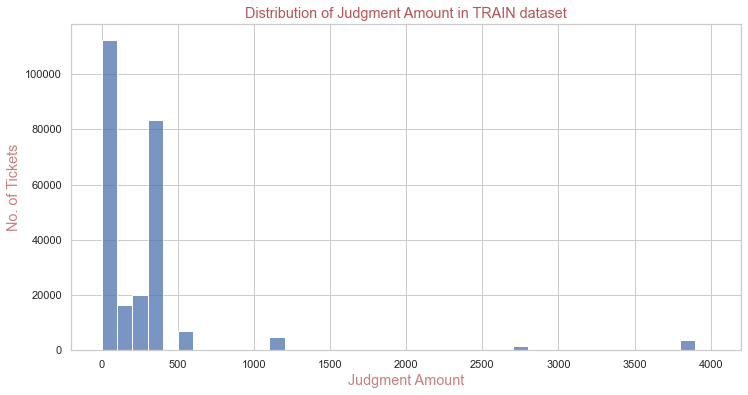

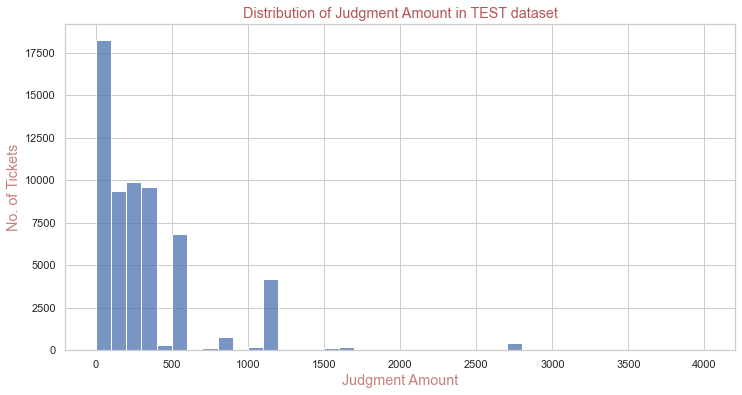

In [15]:
plot_histogram(train_df.judgment_amount, 'TRAIN', 100, (0, 4000))
plot_histogram(test_df.judgment_amount, 'TEST', 100, (0, 4000))

#### 2.4.2.1. Draw Multivariate plots to better understand the relationship between attributes

`Scatter plot matrix / Correlation maps` are not required as we are going to deal with only one featrue `judgment_amount`.

# 3. Research

## 3.1. List of selected algorithms to build models

The following are the algorithms covering a variety of classification strategies and techniques that have been selected for the project. All models will be developed with default parameters and trained. Only a few best will be selected for algorithm tuning based on their performances (evaluation metrics). Then, each of those models will be individually tuned to minimize error. The final model will be selected based on their evaluation metrics on training and test datasets. 

#### Classification algorithms:
```
 1) Logistic Regression (LR)         LogisticRegression()            - Simple Linear
 2) K-Nearest Neighbors (KNN)        KNeighborsClassifier()          - Nonlinear
 3) Gaussian Naive Bayes (NB)        GaussianNB()                    - Nonlinear
 4) Neural Network (NN)              MLPClassifier()                 - Nonlinear
 5) Decision Trees (DT)              DecisionTreeClassifier()        - Nonlinear
 6) Random Forest Trees (RF)         RandomForestClassifier()        - Ensemble Bagging
 7) Gradient Boosting (GB)           GradientBoostingClassifier()    - Ensemble Boosting   
 8) Extreme Boosting (XGB)           XGBClassifier()                 - Ensemble Boosting
```

## 3.2. List of model evaluation metrics

#### Classification model evaluation metrics:
The following metrics have been selected as the `evaluation metrics` for training, refining and evaluating the models.
```
1) Area Under the ROC curve (AUC)
```

Build the above mentioned models, with default parameters, and select the best one based on their `test` scores.

#### Additional Note:
* Use the `judgment_amount` column as the only `Feature` to train the models.
* Use the `compliance` column as the `Target / Predictor` variable.
* Model selection should be based on the AUC score over 0.75 at least.
* Print out the results to see whether there is anything weird (e.g., all probabilities are the same).
* Generally the total runtime should be less than 10 mins. 
* Do NOT use SVM classifiers (SVC) and SGDClassifier as probabilities are not available for them. 

# 4. Data Preprocessing

## 4.1. Data Cleaning

### 4.1.1. Basic data cleaning

#### Remove the duplicate features/columns

*No duplicate features/columns in TRAIN/TEST datasets.*

#### Remove the duplicate samples/rows

*No duplicate samples/rows in TRAIN/TEST datasets.*

#### Remove embedded characters that may cause data misalignment

*No embedded characters in `judgment_amount` feature of TRAIN/TEST datasets.*

#### Handling inconsistent data

*No inconsistent data in `judgement_amount` feature. of TRAIN/TEST datasets.*

## 4.2. Feature Selection

* Use the `judgment_amount` column as the only `Feature` to train the models.
* Use the `compliance` column as the `Target / Predictor` variable.

## 4.3. Feature Engineering

*Not required.*

## 4.4. Dimensionality Reduction

*Not required.*

## 4.5. Split datasets for train-test

#### Keep only one dataframe (df) and delete the rest and release memory for ML processing

In [16]:
del null_values, null_values_per, null_values_df, dup_df

### 4.5.1. Create Independent(X) and Dependent(y) variables

In [17]:
# Set 'ticket_id' as the index in the TEST dataset
test_df.reset_index(inplace=True)
test_df.set_index('ticket_id', inplace=True)

# Remove all the non-violators from the TRAIN dataset, i.e., compliance = Null
train_df = train_df[pd.notnull(train_df.compliance)]

# Select the 'features' and the 'target' variable from the TRAIN dataset
feature = ['judgment_amount']
target  = ['compliance']

X = train_df[feature]              # Independent variable
y = train_df[target]               # Dependent variable

### 4.5.2. Split the dataset into *`train`* and *`test`*

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test:  ', X_test.shape)
print('y_test:  ', y_test.shape)
print('X:       ', X.shape)
print('y:       ', y.shape)
print('train_df:', train_df.shape)
print('test_df: ', test_df.shape)

X_train:  (127904, 1)
y_train:  (127904, 1)
X_test:   (31976, 1)
y_test:   (31976, 1)
X:        (159880, 1)
y:        (159880, 1)
train_df: (159880, 34)
test_df:  (61001, 27)


## 4.6. Handling Imbalanced classes

In [19]:
train_df.groupby('compliance').size()

compliance
0.0    148283
1.0     11597
dtype: int64

#### Resample datasets using SMOTE and make the samples balanced for better learning

In [20]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)
X_smote, y_smote             = SMOTE().fit_resample(X, y)

print(X_train_smote.shape)
print(y_train_smote.shape)
print(X_smote.shape)
print(y_smote.shape)

(237234, 1)
(237234, 1)
(296566, 1)
(296566, 1)


# 5. Model Development

## 5.1. Model definitions

In [21]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))

# 6. Model Training

In [22]:
modelnames     = []
scores_trng    = [] 
trained_models = []

for name, model in models:
    modelnames.append(name)
    trained_models.append(model.fit(X_train_smote, np.array(y_train_smote).ravel()))
    prob = model.predict_proba(y_train_smote)[:, 1]
    scores_trng.append(roc_auc_score(y_train_smote, prob))

In [23]:
print('The probabilities predicted by various models on TRAIN dataset are:')
for i in range(len(modelnames)):
    print('%3s : %6.2f %%' % (modelnames[i], scores_trng[i] * 100))

The probabilities predicted by various models on TRAIN dataset are:
 LR :   0.00 %
KNN :  50.00 %
 NB : 100.00 %
 NN :   0.00 %
 DT :  50.00 %
 RF :  50.00 %
 GB :  50.00 %
XGB :  50.00 %


# 7. Model Refinement

None.

# 8. Model Evaluation

In [24]:
scores_eval = []

for model in trained_models:
    prob = model.predict_proba(y_test)[:, 1]
    scores_eval.append(roc_auc_score(y_test, prob))

In [25]:
print('The probabilities predicted by various models on TEST dataset are:')
for i in range(len(modelnames)):
    print('%8s : %6.2f %%' % (modelnames[i], scores_eval[i] * 100))

The probabilities predicted by various models on TEST dataset are:
      LR :   0.00 %
     KNN :  50.00 %
      NB : 100.00 %
      NN :   0.00 %
      DT :  50.00 %
      RF :  50.00 %
      GB :  50.00 %
     XGB :  50.00 %


# 9. Final Model Selection

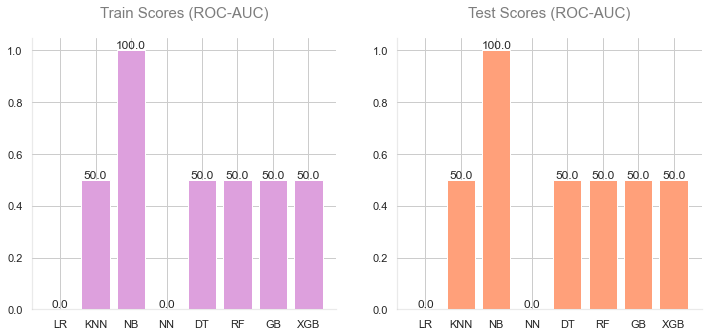

In [26]:
scores_list  = [scores_trng, scores_eval]
scores_names = ['Train Scores (ROC-AUC)', 'Test Scores (ROC-AUC)']
colors       = ['plum', 'lightsalmon']

plot_performance_metrics(scores_list, scores_names, colors, modelnames)

The `Evaluation metrics (ROC-AUC scores)` generated above suggest that the **`Gaussian Naive Bayes (NB)`** is the best model and it is selected as the **`final model`**. NB will be trained on the entire dataset, saved, and deployed into the test infrastructure for business user's testing (i.e., Model Validation).

In [27]:
# Train the final model on the entire dataset and save it to the disk
FinalModel = GaussianNB().fit(X_smote, np.array(y_smote).ravel())
ModelName = 'MLPy-DemoProj-4.sav'
pickle.dump(FinalModel, open(ModelName, 'wb'))

# 10. Model Validation

In [28]:
y_test  = test_df[feature]

probs = FinalModel.predict_proba(y_test)[:,1]

test_df['probability'] = probs

# Check if anything is wierd, i.e., the calculated probabilities are not the same for all tickets
print('Total number of unique probabilities calculated for test tickets are: ', (np.unique(probs).size))

# Write the output to a output file (csv) for verification
filename = 'CoD_blight_tickets_compliance_probability-Out.csv'
output   = test_df['probability'].reset_index()
output.to_csv(filename, index=True)

Total number of unique probabilities calculated for test tickets are:  503


# 11. Model Deployment

The model deployment is usually done by the DS team along with the ML team upon receipt of stakeholders sign-off.